#### Attribute Information:

1) Area (A): La surface d'une zone de haricot et le nombre de pixels à l'intérieur de ses limites.
2) Perimeter (P):  la circonférence d'un haricot est définie comme la longueur de sa bordure.
3) Major axis length (L): La distance entre les extrémités de la ligne la plus longue qui peut être tracée à partir d'un haricot.
4) Minor axis length (l): La ligne la plus longue qui peut être tracée à partir d'une fève tout en étant perpendiculaire à l'axe principal.
5) Aspect ratio (K):  Définit la relation entre L et l.
6) Eccentricity (Ec): Excentricité de l'ellipse ayant les mêmes moments que la région.
7) Convex area (C): nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d'une graine de haricot.
8) Equivalent diameter (Ed): Le diamètre d'un cercle ayant la même surface qu'une graine de haricot.
9) Extent (Ex):  le rapport entre les pixels de la boîte englobante et la surface du haricot.
10) Solidity (S): Également appelée convexité. Il s'agit du rapport entre les pixels de la coquille convexe et ceux qui se trouvent dans les haricots.
11) Roundness (R): calculée à l'aide de la formule suivant: (4piA)/(P^2)
12) Compactness (CO): Mesure la rondeur d'un objet: Ed/L
13) ShapeFactor1 (SF1)
14) ShapeFactor2 (SF2)
15) ShapeFactor3 (SF3)
16) ShapeFactor4 (SF4)
17) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [188]:
import pandas as pd
import os
import numpy as np
import plotly.express as px  # dataviz
import matplotlib.pyplot as plt # dataviz
import scipy.stats as stats
import statsmodels.api
import seaborn as sns

# Standardisation
from sklearn.preprocessing import StandardScaler

# Winsorization
from scipy.stats.mstats import winsorize

# Splitter le dataset
from sklearn.model_selection import train_test_split

# Modélisation = Classification
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Métriques
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix , accuracy_score, recall_score, f1_score, roc_auc_score, precision_score



# Evaluation
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV

#Interpretability
from sklearn.inspection import partial_dependence, PartialDependenceDisplay, permutation_importance
from alibi.explainers import ALE, plot_ale

# Echantillonnage
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Pour la fonction Grubbs et ESD = valeurs atypiques
import scipy.stats as stats

#Pour le test de khi2
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

# I. Introduction et exploration des données

In [140]:
df = pd.read_excel("C:\\Users\\cassa\\OneDrive\\Bureau\\SVM (10 mai)\\Cours n°2\\Dry_Bean_Dataset (1).xlsx")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


Le dataframe est composé de 13611 observations et de 17 variables. 

In [141]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [142]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Nous avons 3 groupes de variables distincts :
* les mesures de tailles : Area, Perimeter, MajorAxisLength, MinorAxisLength, CovexArea et EquivDiameter
* les mesures de formes : AspectRation, Eccentricity, roundness,Compactness
* les mesures de contour/régularité : Extent, Solidity
* les mesures composites : les ShapesFactor 1/2/3/4

## Typage des données 

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Notre variable d'intéret n'est pas correctement formatée, nous allons la typer en catégorie.

In [144]:
# Conversion en format catégoriel
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             13611 non-null  int64   
 1   Perimeter        13611 non-null  float64 
 2   MajorAxisLength  13611 non-null  float64 
 3   MinorAxisLength  13611 non-null  float64 
 4   AspectRation     13611 non-null  float64 
 5   Eccentricity     13611 non-null  float64 
 6   ConvexArea       13611 non-null  int64   
 7   EquivDiameter    13611 non-null  float64 
 8   Extent           13611 non-null  float64 
 9   Solidity         13611 non-null  float64 
 10  roundness        13611 non-null  float64 
 11  Compactness      13611 non-null  float64 
 12  ShapeFactor1     13611 non-null  float64 
 13  ShapeFactor2     13611 non-null  float64 
 14  ShapeFactor3     13611 non-null  float64 
 15  ShapeFactor4     13611 non-null  float64 
 16  Class            13611 non-null  categor

In [146]:
#Supprimer les shapefactors

df.drop(columns=['ShapeFactor1'], inplace=True)
df.drop(columns=['ShapeFactor2'], inplace=True)
df.drop(columns=['ShapeFactor3'], inplace=True)
df.drop(columns=['ShapeFactor4'], inplace=True)

# II. Analyse exploratoire

In [147]:
#matrice de corrélation
import plotly.express as px
correlation =  round(df.corr(numeric_only = True),  ndigits=2)

fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale = 'Viridis',
                range_color=(0, 1),
                title='Correlation Matrix',
                width=800,
                height=800
            )

fig.update_xaxes(tickangle=40)

fig.show()

Au vu de la corrélation, plusieurs groupes de variables sont fortement corrélées.
Nous allons donc chercher à regrouper des variables, nous allons utiliser les indices de taille composite afin de réduire le nombre de variables tout en conservant l'information discriminantes.
Pour les variables de taille nous ne garderont que la variable "Area"

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>],
       [<Axes: title={'center': 'MinorAxisLength'}>,
        <Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>],
       [<Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>,
        <Axes: title={'center': 'Extent'}>],
       [<Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>]], dtype=object)

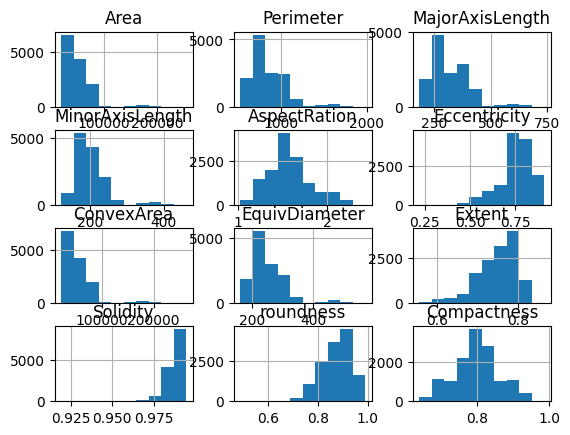

In [148]:
df.hist()


Distribution des classes:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


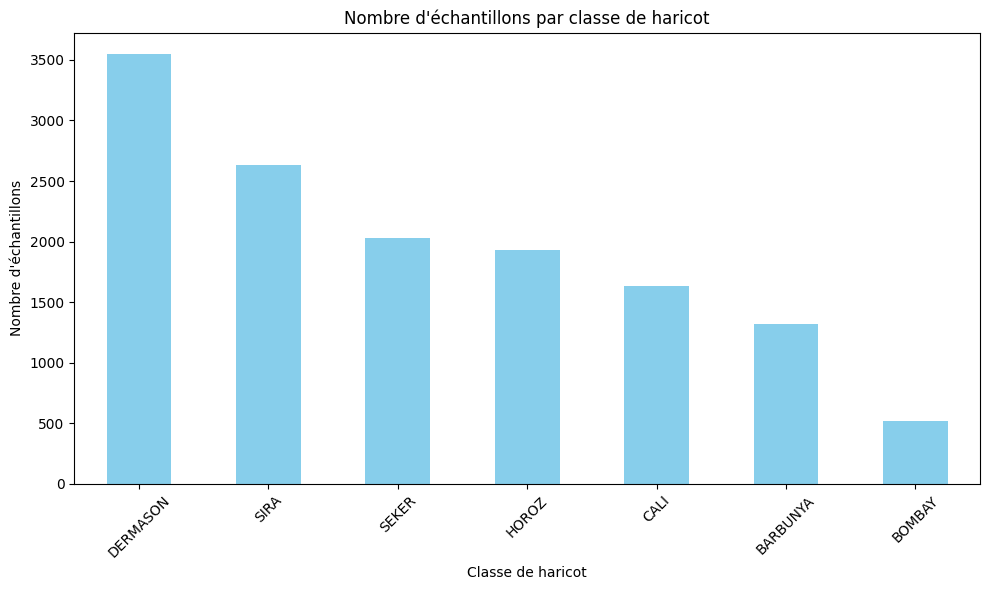

In [149]:
# Visualisation de la distribution des classes
print("\nDistribution des classes:")
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'échantillons par classe de haricot')
plt.xlabel('Classe de haricot')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribution_classes.png')
plt.show()


Text(0, 0.5, 'Étendue')

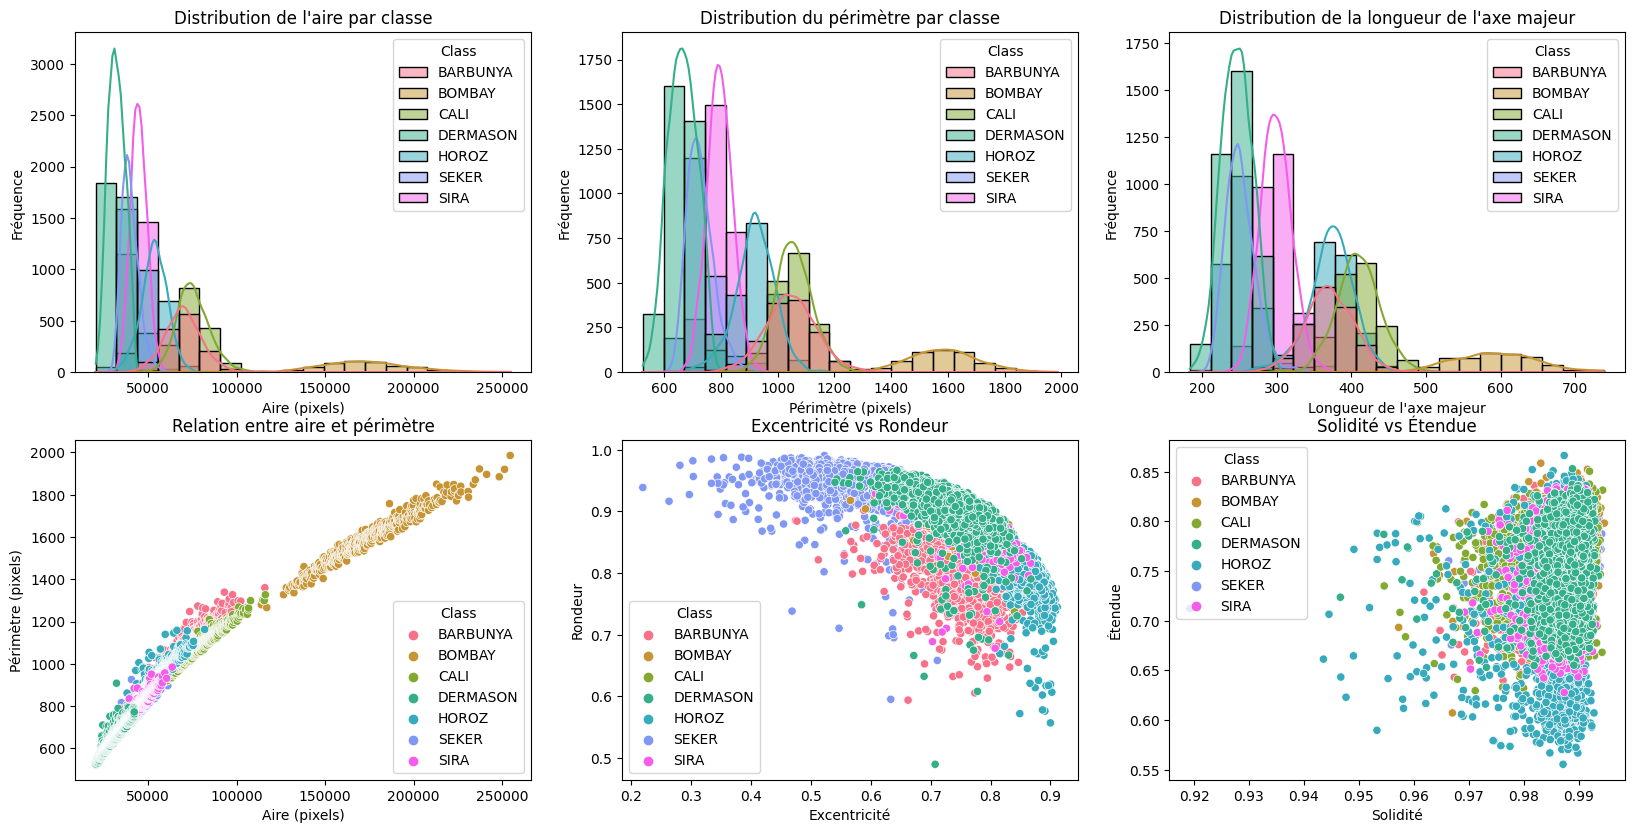

In [150]:
# Création d'une palette de couleurs pour différencier les classes
colors = sns.color_palette("husl", len(df['Class'].unique()))

# Histogrammes des principaux attributs
plt.figure(figsize=(20, 15))

# 1. Histogramme de l'aire (Area)
plt.subplot(3, 3, 1)
sns.histplot(data=df, x='Area', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de l\'aire par classe', fontsize=12)
plt.xlabel('Aire (pixels)')
plt.ylabel('Fréquence')

# 2. Histogramme du périmètre (Perimeter)
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='Perimeter', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du périmètre par classe', fontsize=12)
plt.xlabel('Périmètre (pixels)')
plt.ylabel('Fréquence')

# 3. Histogramme de l'axe majeur (Major axis length)
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='MajorAxisLength', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la longueur de l\'axe majeur', fontsize=12)
plt.xlabel('Longueur de l\'axe majeur')
plt.ylabel('Fréquence')

# 4. Graphique de dispersion entre Area et Perimeter
plt.subplot(3, 3, 4)
sns.scatterplot(data=df, x='Area', y='Perimeter', hue='Class', palette=colors)
plt.title('Relation entre aire et périmètre', fontsize=12)
plt.xlabel('Aire (pixels)')
plt.ylabel('Périmètre (pixels)')

# 5. Graphique de dispersion entre Eccentricity et Roundness
plt.subplot(3, 3, 5)
sns.scatterplot(data=df, x='Eccentricity', y='roundness', hue='Class', palette=colors)
plt.title('Excentricité vs Rondeur', fontsize=12)
plt.xlabel('Excentricité')
plt.ylabel('Rondeur')

# 6. Graphique de dispersion entre Solidity et Extent
plt.subplot(3, 3, 6)
sns.scatterplot(data=df, x='Solidity', y='Extent', hue='Class', palette=colors)
plt.title('Solidité vs Étendue', fontsize=12)
plt.xlabel('Solidité')
plt.ylabel('Étendue')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             13611 non-null  int64   
 1   Perimeter        13611 non-null  float64 
 2   MajorAxisLength  13611 non-null  float64 
 3   MinorAxisLength  13611 non-null  float64 
 4   AspectRation     13611 non-null  float64 
 5   Eccentricity     13611 non-null  float64 
 6   ConvexArea       13611 non-null  int64   
 7   EquivDiameter    13611 non-null  float64 
 8   Extent           13611 non-null  float64 
 9   Solidity         13611 non-null  float64 
 10  roundness        13611 non-null  float64 
 11  Compactness      13611 non-null  float64 
 12  Class            13611 non-null  category
dtypes: category(1), float64(10), int64(2)
memory usage: 1.3 MB


In [152]:
#conservation que des classes dermason et horoz 
df = df[df['Class'].isin(['DERMASON', 'HOROZ'])]
df['Class'] = df['Class'].cat.remove_unused_categories()
df

C:\Users\cassa\AppData\Local\Temp\ipykernel_19808\576472809.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
5501,33006,710.496,283.020385,149.623719,1.891548,0.848829,33354,204.998889,0.635476,0.989566,0.821636,0.724326,HOROZ
5502,33263,719.325,271.339035,158.566112,1.711204,0.811477,34108,205.795449,0.672741,0.975226,0.807832,0.758444,HOROZ
5503,33407,706.222,281.535296,152.741906,1.843209,0.840035,33989,206.240426,0.809867,0.982877,0.841715,0.732556,HOROZ
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,HOROZ
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,DERMASON


# II. Modélisation

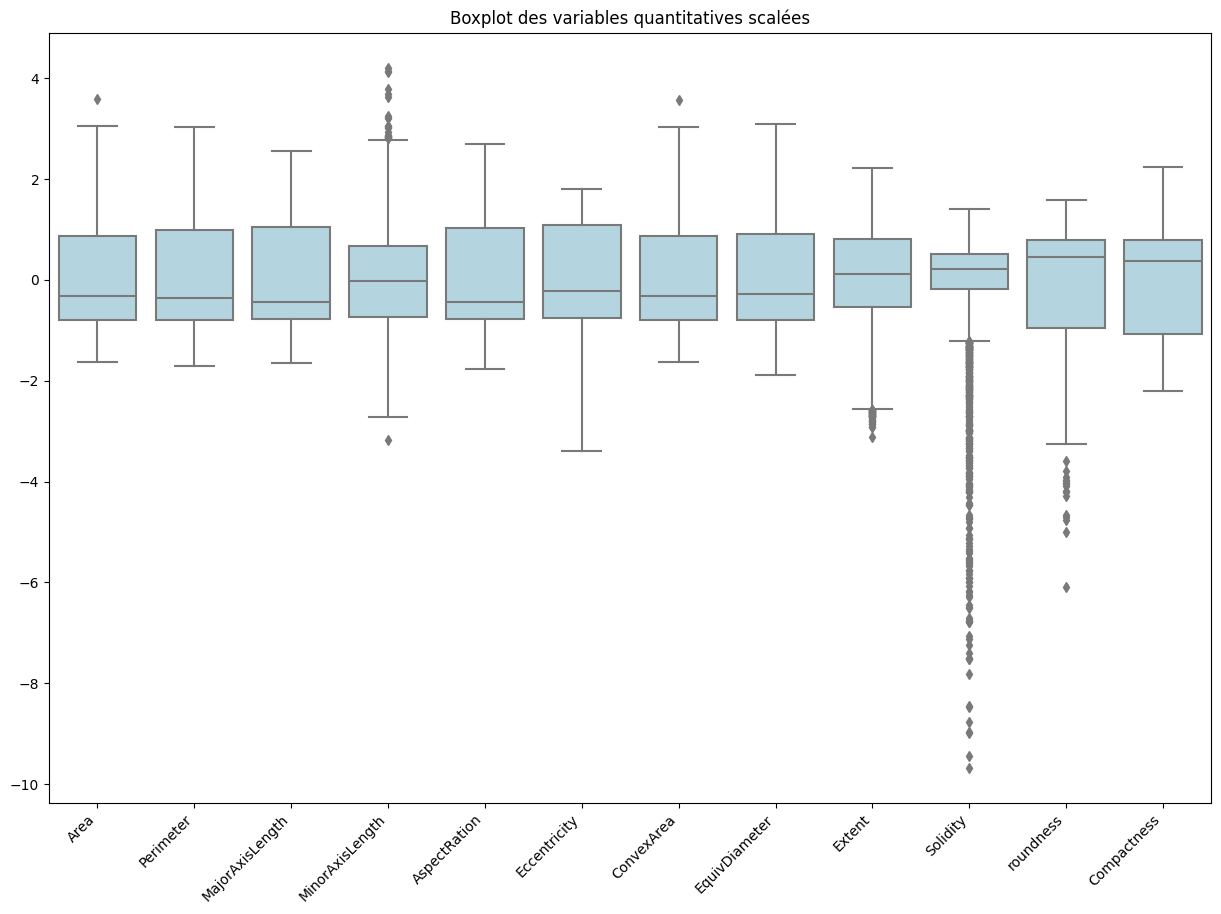

In [153]:
#Standardisation des données
features_quanti=df.select_dtypes(exclude=["category"])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(features_quanti), columns=features_quanti.columns)

# Créer un boxplot pour toutes les variables numériques
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_scaled, color='lightblue')
plt.title('Boxplot des variables quantitatives scalées')

plt.xticks(rotation=45, ha="right")
# Afficher le graphique
plt.show()

In [154]:
import numpy as np
from scipy import stats

def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    return critical_value

def ESD_Test(input_series, alpha, max_outliers):
    input_series = np.array(input_series) #Transformation de la colonne en array
    
    # Vérification que la série n'est pas vide
    if len(input_series) <= 2:
        print("Nombre de valeurs atypiques : 0")
        print("Valeur atypique seuil : -")
        return 0, "-", 0, 0
    
    #Initialisation des valeurs
    nb_outliers = 0
    valeur_atypique_seuil = "-"
    last_Gstat = 0
    last_Gcritical = 0
    
    #Itération pour chaque valeur de la série
    for iterations in range(min(max_outliers, len(input_series) - 2)):
        if len(input_series) <= 2:
            break
            
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        
        #Récupère les valeurs de la dernière itération où la valeur est considérée comme atypique
        if round(Gstat, 4) > round(Gcritical, 4):
            nb_outliers += 1
            valeur_atypique_seuil = input_series[max_index]
            last_Gstat = Gstat
            last_Gcritical = Gcritical
        
        #Supprime la valeur de l'itération pour tester sur d'autres
        input_series = np.delete(input_series, max_index)
    
    #Print des résultats du test
    print("Nombre de valeurs atypiques : " + str(nb_outliers))
    print("Valeur atypique seuil : {}".format(valeur_atypique_seuil))
    
    return nb_outliers, valeur_atypique_seuil, last_Gstat, last_Gcritical

# Appliquer le test ESD à chaque colonne de features_quanti
for column in features_quanti.columns:
    print(f"Test ESD pour la colonne : {column}")
    ESD_Test(features_quanti[column], alpha=0.05, max_outliers=100)
    print('-----------------------------------------------')

Test ESD pour la colonne : Area
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Perimeter
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : MajorAxisLength
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : MinorAxisLength
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : AspectRation
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Eccentricity
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : ConvexArea
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
---------------------------------

In [155]:
# Statistiques descriptives pour Solidity par classe
solidity_stats = df.groupby('Class')['Solidity'].describe()
print("\nStatistiques descriptives pour Solidity par classe:")
print(solidity_stats)

# Statistiques descriptives pour roundness par classe
roundness_stats = df.groupby('Class')['roundness'].describe()
print("\nStatistiques descriptives pour roundness par classe:")
print(roundness_stats)



Statistiques descriptives pour Solidity par classe:
           count      mean       std       min       25%       50%       75%  \
Class                                                                          
DERMASON  3546.0  0.988226  0.002969  0.946634  0.987328  0.988717  0.989873   
HOROZ     1928.0  0.985480  0.006073  0.943559  0.984673  0.987018  0.988656   

               max  
Class               
DERMASON  0.993629  
HOROZ     0.992798  

Statistiques descriptives pour roundness par classe:
           count      mean       std       min       25%       50%       75%  \
Class                                                                          
DERMASON  3546.0  0.908114  0.029430  0.489618  0.897145  0.912320  0.924957   
HOROZ     1928.0  0.794420  0.031822  0.556766  0.780079  0.795961  0.812629   

               max  
Class               
DERMASON  0.966603  
HOROZ     0.921059  


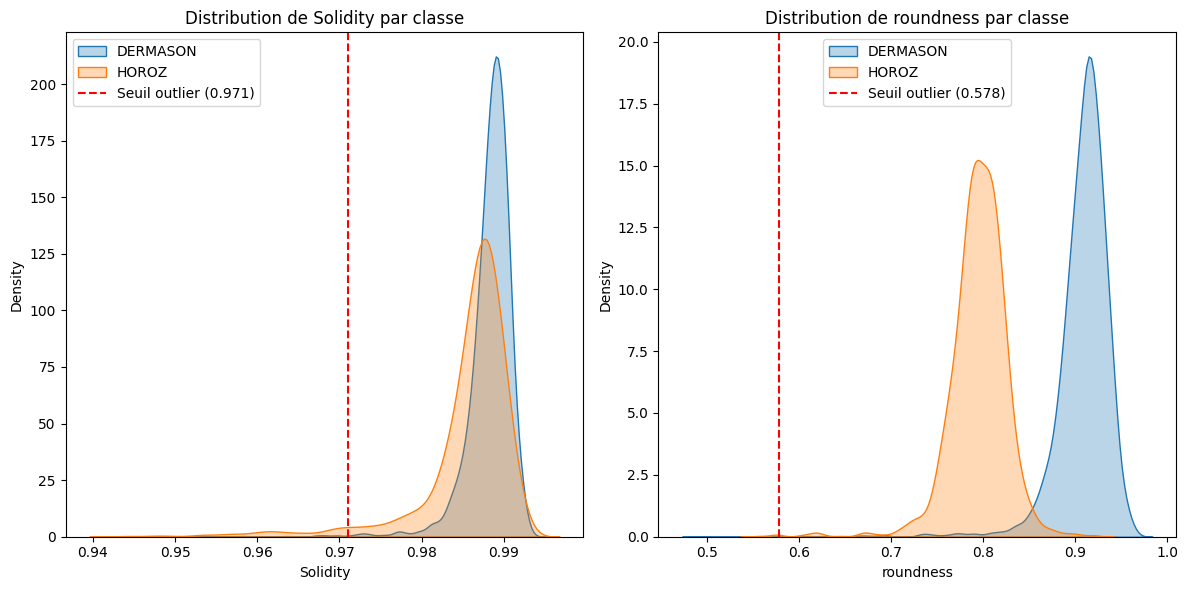

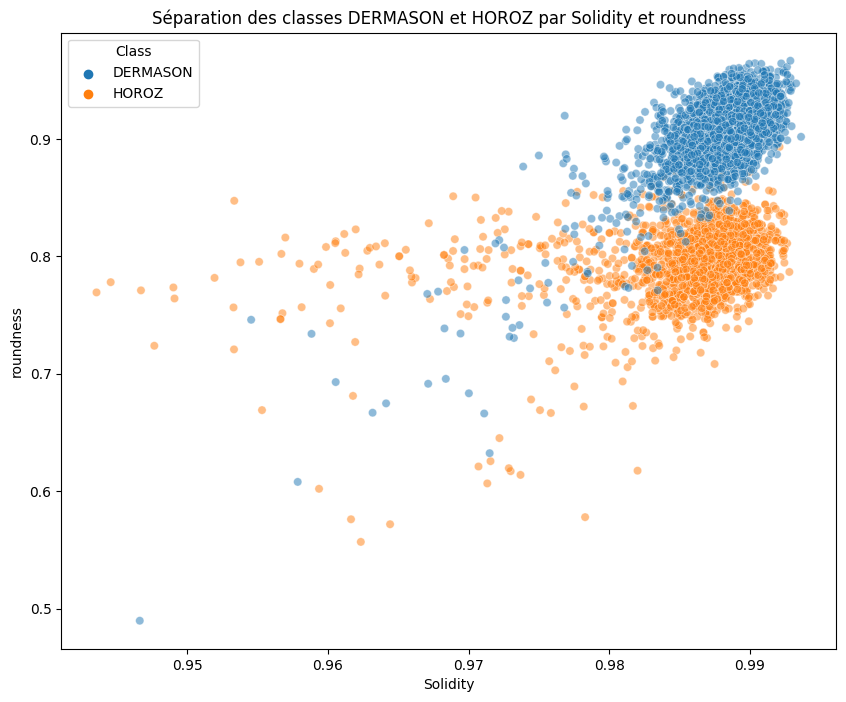

In [156]:
# Visualisation ciblée DERMASON vs HOROZ
plt.figure(figsize=(12, 6))

# Densité pour Solidity
plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['Class']=='DERMASON'], x='Solidity', label='DERMASON', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Class']=='HOROZ'], x='Solidity', label='HOROZ', fill=True, alpha=0.3)
plt.axvline(0.971, color='red', linestyle='--', label='Seuil outlier (0.971)')
plt.title('Distribution de Solidity par classe')
plt.legend()

# Densité pour roundness
plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Class']=='DERMASON'], x='roundness', label='DERMASON', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Class']=='HOROZ'], x='roundness', label='HOROZ', fill=True, alpha=0.3)
plt.axvline(0.578, color='red', linestyle='--', label='Seuil outlier (0.578)')
plt.title('Distribution de roundness par classe')
plt.legend()

plt.tight_layout()
plt.show()

# Graphique de dispersion 2D pour voir la séparation des classes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Solidity', y='roundness', hue='Class', alpha=0.5)
plt.title("Séparation des classes DERMASON et HOROZ par Solidity et roundness")
plt.show()

En analysant les distribution de ces variables nous confirmons notre choix de garder les deux variables malgré leur outliers, ces différences seront des éléments important pour différencier les classes d'haricot lors de la classification

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5474 entries, 5501 to 13610
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             5474 non-null   int64   
 1   Perimeter        5474 non-null   float64 
 2   MajorAxisLength  5474 non-null   float64 
 3   MinorAxisLength  5474 non-null   float64 
 4   AspectRation     5474 non-null   float64 
 5   Eccentricity     5474 non-null   float64 
 6   ConvexArea       5474 non-null   int64   
 7   EquivDiameter    5474 non-null   float64 
 8   Extent           5474 non-null   float64 
 9   Solidity         5474 non-null   float64 
 10  roundness        5474 non-null   float64 
 11  Compactness      5474 non-null   float64 
 12  Class            5474 non-null   category
dtypes: category(1), float64(10), int64(2)
memory usage: 561.4 KB


In [180]:
from sklearn.utils import resample

df_majority = df[df['Class']=='DERMASON']
df_minority = df[df['Class']=='HOROZ']

# Sous-échantillonnage
df_majority_downsampled = resample(
    df_majority, 
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Combinaison des datasets équilibrés
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced['Class'].value_counts()

DERMASON    1928
HOROZ       1928
Name: Class, dtype: int64

In [ ]:
# Séparation des données en variables explicatives et cible

X = df_balanced.iloc[:, :-1]
y = df_balanced['Class']

In [177]:
# Création et application du LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Pour voir la correspondance des classes
print("Classes originales:", le.classes_)
print("Classes encodées:", list(range(len(le.classes_))))

Classes originales: ['DERMASON' 'HOROZ']
Classes encodées: [0, 1]


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True, random_state=42)

In [194]:
#Standardisation des données
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)


In [195]:
#Indicateurs de performance des modèles - inspirée d'anciens étudiants du master
def indicateur(model, X, y, ech):
    # Prédiction du modèle
    valid_pred = model.predict(X).round()

    # Calcul des métriques
    conf_matrix = confusion_matrix(y, valid_pred)
    accuracy = accuracy_score(y, valid_pred)
    error_rate = 1 - accuracy
    recall = recall_score(y, valid_pred)
    precision = precision_score(y, valid_pred)
    f1 = f1_score(y, valid_pred)

    # Affichage des résultats
    print(f"\033[1mIndicateurs de l'échantillon {ech} :\033[0m")
    print(f"Matrice de confusion :\n{conf_matrix}")
    print(f"Qualité du modèle (Accuracy) : {round(accuracy, 2)}")
    print(f"Taux d'erreur : {round(error_rate, 2)}")
    print(f"Recall : {round(recall, 2)}")
    print(f"Precision : {round(precision, 2)}")
    print(f"F1 Score  : {round(f1, 2)}")

#Regression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_sc, y_train)

#LinearSVC
l_svc= LinearSVC(random_state=42, max_iter=2000)
l_svc.fit(X_train_sc, y_train)

#SGDClassifier
sdg = SGDClassifier(loss='hinge' ,random_state=42)
sdg.fit(X_train_sc, y_train)

#SVM avec kernel linéaire
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train_sc, y_train)

#SVM avec noyau RBF
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train_sc, y_train)

#SVM avec noyau poly
svc_poly = SVC(kernel='poly',random_state=0)
svc_poly.fit(X_train_sc, y_train)

#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sc, y_train)

#Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_sc, y_train)

#XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [202]:
#Logistic Regression
print("\n\nLogistic Regression")
print("===================================")
indicateur(log_reg, X_train_sc, y_train, "train")
indicateur(log_reg, X_test_sc, y_test, "test")

# Linear SVC
print("\n\nLinear SVC")
print("===================================")
indicateur(l_svc, X_train_sc, y_train, "train")
indicateur(l_svc, X_test_sc, y_test, "test")

# SGD Classifier
print("\n\nSGD Classifier")
print("===================================")
indicateur(sdg, X_train_sc, y_train, "train")
indicateur(sdg, X_test_sc, y_test, "test")

# SVC avec kernel linéaire
print("\n\nSVC avec kernel linéaire")
print("===================================")
indicateur(svc, X_train_sc, y_train, "train")
indicateur(svc, X_test_sc, y_test, "test")

# SVC avec noyau RBF
print("\n\nSVC avec noyau RBF")
print("===================================")
indicateur(rbf_svc, X_train_sc, y_train, "train")
indicateur(rbf_svc, X_test_sc, y_test, "test")

# SVC avec noyau polynomial
print("\n\nSVC avec noyau polynomial")
print("===================================")
indicateur(svc_poly, X_train_sc, y_train, "train")
indicateur(svc_poly, X_test_sc, y_test, "test")

# Random Forest
print("\n\nRandom Forest")
print("===================================")
indicateur(rf, X_train_sc, y_train, "train")
indicateur(rf, X_test_sc, y_test, "test")

# Gradient Boosting
print("\n\nGradient Boosting")
print("===================================")
indicateur(gb, X_train_sc, y_train, "train")
indicateur(gb, X_test_sc, y_test, "test")

# XGBoost
print("\n\nXGBoost")
print("===================================")
indicateur(xgb, X_train_sc, y_train, "train")
indicateur(xgb, X_test_sc, y_test, "test")





Logistic Regression
Indicateurs de l'échantillon train :
Matrice de confusion :
[[1520    8]
 [  18 1538]]
Qualité du modèle (Accuracy) : 0.99
Taux d'erreur : 0.01
Recall : 0.99
Precision : 0.99
F1 Score  : 0.99
Indicateurs de l'échantillon test :
Matrice de confusion :
[[400   0]
 [  6 366]]
Qualité du modèle (Accuracy) : 0.99
Taux d'erreur : 0.01
Recall : 0.98
Precision : 1.0
F1 Score  : 0.99


Linear SVC
Indicateurs de l'échantillon train :
Matrice de confusion :
[[1521    7]
 [  18 1538]]
Qualité du modèle (Accuracy) : 0.99
Taux d'erreur : 0.01
Recall : 0.99
Precision : 1.0
F1 Score  : 0.99
Indicateurs de l'échantillon test :
Matrice de confusion :
[[400   0]
 [  6 366]]
Qualité du modèle (Accuracy) : 0.99
Taux d'erreur : 0.01
Recall : 0.98
Precision : 1.0
F1 Score  : 0.99


SGD Classifier
Indicateurs de l'échantillon train :
Matrice de confusion :
[[1516   12]
 [  16 1540]]
Qualité du modèle (Accuracy) : 0.99
Taux d'erreur : 0.01
Recall : 0.99
Precision : 0.99
F1 Score  : 0.99
I